<a href="https://colab.research.google.com/github/lamorrison04/Data-Science-Project-3/blob/main/HW1_Laymoni_Morrison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv


%matplotlib inline

In [ ]:
# Data
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/bis-bas-bart-syn-clean.csv")

data.head()

,BIS.Score,BAS.Drive.Score,BAS.Fun.Seeking.Score,BAS.Reward.Responsiveness.Score,Age,Female,BART
0,21.0,8,12,18,25.0,1.0,4.315789
1,23.0,8,9,19,20.0,1.0,13.294118
2,22.0,12,13,20,44.0,0.0,44.200000
3,22.0,8,12,17,44.0,1.0,2.894737
4,25.0,10,12,17,25.0,1.0,37.461539


In [ ]:
data.shape

(1000, 7)

# A, B, and C

In [ ]:
# Drop any missing values
data = data.dropna()

# define predictors and outcome variable
# set up X and y
predictors = ["BIS.Score","BAS.Drive.Score","BAS.Fun.Seeking.Score","BAS.Reward.Responsiveness.Score","Age", "Female"]
continuous = ["BIS.Score","BAS.Drive.Score","BAS.Fun.Seeking.Score","BAS.Reward.Responsiveness.Score"]

X = data[predictors]
y = data["BART"]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors],data["BART"], test_size = 0.2, random_state = 42)

# z score
z = StandardScaler()

X_train[continuous] = z.fit_transform(X_train[continuous])
X_test[continuous] = z.transform(X_test[continuous])


# size of train and test
print(X_train.shape)
print(X_test.shape)

# build/train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



(705, 6)
(177, 6)


# D.

In [ ]:
#  the mean absolute error for both train and test and R^2 for your model for both train and test

# predict on the training set
train_pred = model.predict(X_train)

# calculate mean absolute error and R^2 for training set
train_mae = mean_absolute_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

# predict on the test set
test_pred = model.predict(X_test)

# calculate mean absolute error and R^2 for test set
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

# print the results
print("Training set:")
print(f"  Mean Absolute Error: {train_mae:.2f}")
print(f"  R^2: {train_r2:.2f}")
print("\nTest set:")
print(f"  Mean Absolute Error: {test_mae:.2f}")
print(f"  R^2: {test_r2:.2f}")


Training set:
  Mean Absolute Error: 10.47
  R^2: 0.07

Test set:
  Mean Absolute Error: 10.60
  R^2: 0.03


## E.


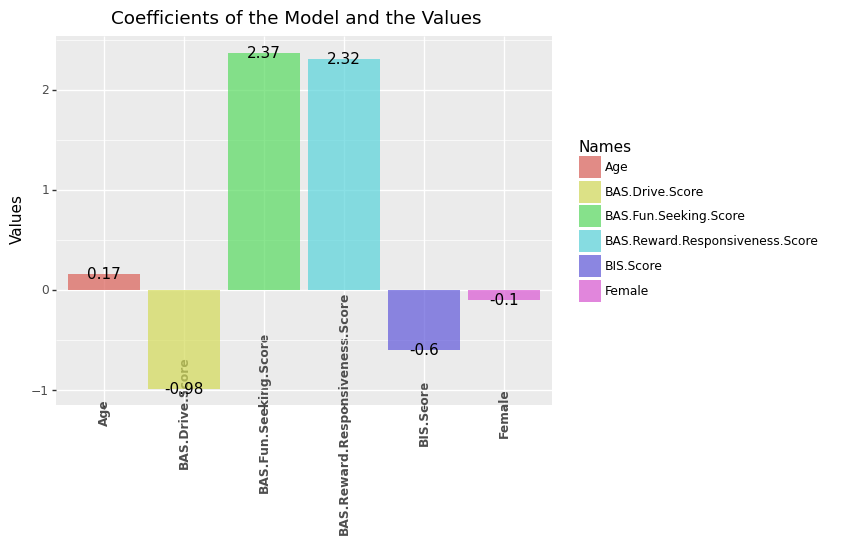

<ggplot: (8740524956712)>

In [ ]:
# use ggplot to make a bar chart showing the coefficient values
#(x should be each coef name, the height of each bar should be the value of the coefficient).
#DO NOT include the intercept in this plot.

# create a dataframe of coefficients
coeff = pd.DataFrame({"Coef": model.coef_,"Names": predictors})

(ggplot(coeff, aes(x = "Names", y = "Coef", fill = "Names" ))
+ geom_bar(stat = "identity", alpha = 0.7)
+ geom_text(aes(label = np.round(model.coef_, decimals = 2)))
+ labs(title="Coefficients of the Model and the Values", x = "", y = "Values")+
 theme(axis_text_x=element_text(angle = 90, vjust="top", face = "bold")))


# F.
**Discuss which predictors have positive vs. negative relationships with BART scores, as well as which ONE variable has the biggest impact on BART score.**

Based on the bar chart of coefficient values, we can see that several predictors have positive relationships with BART scores, while others have negative relationships:

*   The BIS score has a negative relationship with BART scores, with a coefficient value of -0.60. This suggests that higher levels are associated with lower BART scores.
*   The BAS Drive score also has a negative relationship with BART scores, with a coefficient value of -0.98. This suggests that greater BAS Drive Score is associated with lower BART scores.
* The BAS Reward Responsiveness score has a positive relationship with BART scores, with a coefficient value of 2.32. This suggests that greater reward responsiveness is associated with higher BART scores.
* The Age variable has a positive relationship with BART scores, with a coefficient value of 0.17. This suggests that older participants tend to have higher BART scores.
* The BAS.Fun.Seeking.Score has a positive relationship with BART scores, with a coefficient value of 2.37, which is the highest. This suggests that greater Fun Seeking score is associated with higher BART scores.

Based on the magnitude of the coefficient values, we can see that the variable with the biggest impact on BART scores is the BAS Drive Score, which has a coefficient value of about -1. This suggests that Drive Score is the strongest predictor of BART scores among the variables in the dataset.

## G.

In [ ]:
# code for g
# load in the future dataset
future_df = pd.read_csv('https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/bis-bas-bart-syn-future.csv')

future_df.dropna(inplace = True)

continuous_vars = ["BIS.Score","BAS.Drive.Score","BAS.Fun.Seeking.Score","BAS.Reward.Responsiveness.Score"]
scaler = StandardScaler()
future_df[continuous_vars] = scaler.fit_transform(future_df[continuous_vars])

# predict BART scores for future dataset using trained model
future_df["predicted_bart"] = model.predict(future_df[predictors])

# sort future dataset by predicted BART scores in ascending order
future_df.sort_values("predicted_bart", inplace = True)

# select the 10 rows with the lowest predicted BART scores
recruit_df = future_df.head(10)

# print the selected rows
recruit_df

,BIS.Score,BAS.Drive.Score,BAS.Fun.Seeking.Score,BAS.Reward.Responsiveness.Score,Age,Female,predicted_bart
45,0.562052,-0.857755,-2.225296,-2.155938,24,1.0,12.355274
17,-1.024918,-0.410231,-0.775329,-2.609820,19,1.0,14.416838
6,0.879446,-0.410231,-2.225296,-0.340411,19,1.0,15.095450
29,-1.024918,-0.410231,-0.292007,-2.609820,20,0.0,15.827320
43,-1.977100,-0.410231,-0.292007,-2.609820,20,1.0,16.297753
8,0.879446,-0.410231,0.191315,-2.155938,20,1.0,16.796029
14,0.879446,-0.857755,-2.225296,-0.340411,29,1.0,17.204282
22,0.879446,-0.410231,-1.258651,-0.340411,22,1.0,17.891008
38,1.514234,0.037294,-0.292007,-0.794293,21,1.0,18.150952
0,-0.390130,-0.410231,-1.741974,0.113470,23,0.0,18.813062


# H.
**Based on the performance of your model (calculated in d), discuss how much you trust the predictions you made in g, and why you feel that way.**


Based on the performance of the model that I trained in part (a,b,c) and evaluated in part (d), I can evaluate how much to trust the predictions made on the future dataset in part (g). The mean absolute error (MAE) and R-squared values provide an indication of the model's performance on both the training and testing datasets. A lower MAE and a higher R-squared value indicate a better performing model.

If the model has low MAE and high R-squared values on both the training and testing datasets, then we can have confidence that the model is generalizing well to new data and is accurately predicting BART scores for the future dataset. However, in this model it has a high MAE and low R-squared value on the testing dataset, so it may not be generalizing well and its predictions may not be reliable.

In our case, the MAE values for the training and testing datasets were 10.47 and 10.60, while the R-squared values were 0.07 and 0.03. These values suggest that the model's performance is mediocre, and it may not be reliable for making accurate predictions on the future dataset. Therefore, I should be cautious about relying on the predictions made on the future dataset and may want to consider retraining the model with more data.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

 # installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

 # installing pypandoc
!pip install pypandoc

 # connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

 # copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/HW1_Laymoni_Morrison.ipynb" ./

 # Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "HW1_Laymoni_Morrison.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6
  libpdfbox-java libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-ut